## Tarea

Importa las librerías necesarias para resolver los siguientes ejercicios (no necesitaras ninguna que no hayamos utilizado nosotros)

In [9]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
from shapely.ops import nearest_points
import os

#### 1.
Grafica la división estatal de México (usando el shapefile que usamos en la clase) en diferentes tonos de algún color que elijas. Pintalos según su área. Los estados más oscuros siendo los más grandes

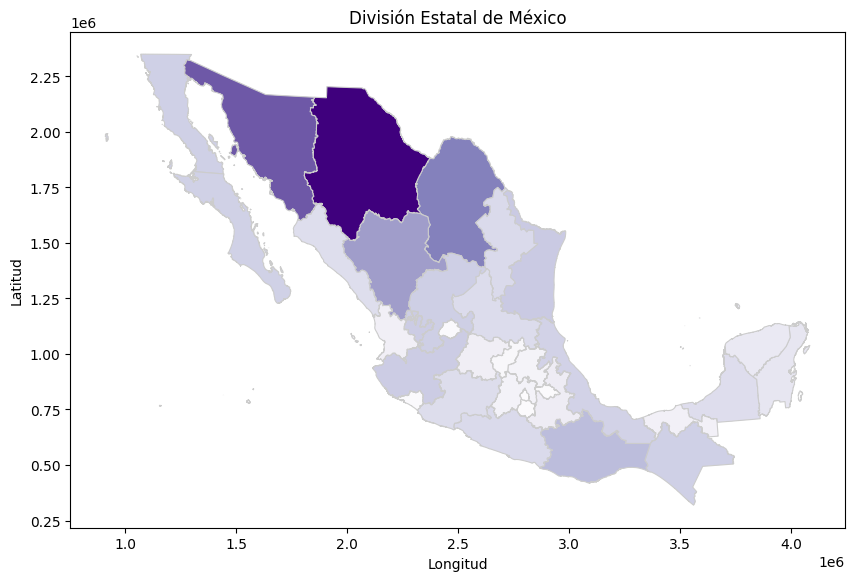

In [15]:
estados = gpd.read_file('Estados/conjunto_de_datos')
# Calcular el área de cada estado y agregarla como una nueva columna
estados['area'] = estados['geometry'].area

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotear los estados con tonos de morado según su área
estados.plot(column='area', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')

# Ajustar la leyenda
ax.set_title('División Estatal de México')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()


#### 2.
Crea un área de 5km alrededor de cada escuela. Calcula el área total cubierta y saca el porcentaje de área del país cubierta por escuelas.
Tip: cuidado con las intersecciones y las unidades!

In [16]:
# Leer los datos de las escuelas
escuelas = gpd.read_file('Escuelas/conjunto_de_datos')

# Convertir las escuelas a un sistema de coordenadas proyectadas (EPSG: 6372)
escuelas = escuelas.to_crs(epsg=6372)

# Leer los datos de los estados
estados = gpd.read_file('Estados/conjunto_de_datos')

# Convertir los estados a un sistema de coordenadas proyectadas (EPSG: 6372)
estados = estados.to_crs(epsg=6372)

# Crear un buffer alrededor de las escuelas
escuelas['buffer'] = escuelas.geometry.buffer(5000)

# Unir todos los buffers de las escuelas en un solo polígono
union_escuelas = escuelas['buffer'].unary_union

# Calcular el área total cubierta por los buffers de las escuelas
area = union_escuelas.area

# Calcular el área total de México
areaMexico = estados.geometry.unary_union.area

# Calcular el porcentaje del territorio de México cubierto por las escuelas
porcentaje = (area / areaMexico) * 100

# Imprimir el resultado
print('Las escuelas cubren un '+str(round(porcentaje, 2))+'% del territorio.')

Las escuelas cubren un 16.16% del territorio.


#### 3.
Calcula la distancia entre la CDMX y todos los demás estados de la república. 
Bonus: punto extra si lo haces usando las fronteras y no los centroides.

In [18]:
# Seleccionar los datos de los estados de la Ciudad de México
cdmx = estados[estados['NOMGEO'] == 'Ciudad de México'].geometry.unary_union

# Calcular las distancias de los estados a la Ciudad de México en metros
distancias_metros = estados[estados['NOMGEO'] != 'Ciudad de México'].apply(
    lambda row: cdmx.distance(row.geometry), axis=1)

# Convertir las distancias de metros a kilómetros
distancias_km = distancias_metros / 1000  # 1 metro = 0.001 kilómetros

# Agregar las distancias en kilómetros al DataFrame de estados
estados['Distancia a CDMX (km)'] = distancias_km

# Imprimir los estados y sus distancias a la Ciudad de México en kilómetros
print("Distancias de los estados a la Ciudad de México en kilómetros:")
print(estados[['NOMGEO', 'Distancia a CDMX (km)']])


Distancias de los estados a la Ciudad de México en kilómetros:
                             NOMGEO  Distancia a CDMX (km)
0                    Aguascalientes             379.557116
1                   Baja California            1645.551348
2               Baja California Sur            1127.556532
3                          Campeche             682.973830
4              Coahuila de Zaragoza             573.236161
5                            Colima             431.986957
6                           Chiapas             579.734459
7                         Chihuahua             913.759024
8                  Ciudad de México                    NaN
9                           Durango             618.267663
10                       Guanajuato             128.951548
11                         Guerrero              50.114395
12                          Hidalgo              28.546022
13                          Jalisco             305.170985
14                           México               0.

#### 4.
Metete al INEGI y descarga el shapefile de nombre "Servicios profesionales, científicos y técnicos" de 2023 (más info en el READ ME y en la presentación). Grafica las escuelas (sólo las primarias, secundarias y prepas), y los servicios que se muestran en este shapefile (las escuelas de un color y los servicios de otro). También grafica los estados. Comenta si ves alguna relación entre la localización de estas escuelas y los servicios.

/tmp/ipykernel_42028/3047334524.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  escuelas['nombre_act'].str.contains(regex_primaria) |
/tmp/ipykernel_42028/3047334524.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  escuelas['nombre_act'].str.contains(regex_secundaria) |
/tmp/ipykernel_42028/3047334524.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  escuelas['nombre_act'].str.contains(regex_prep_bach)


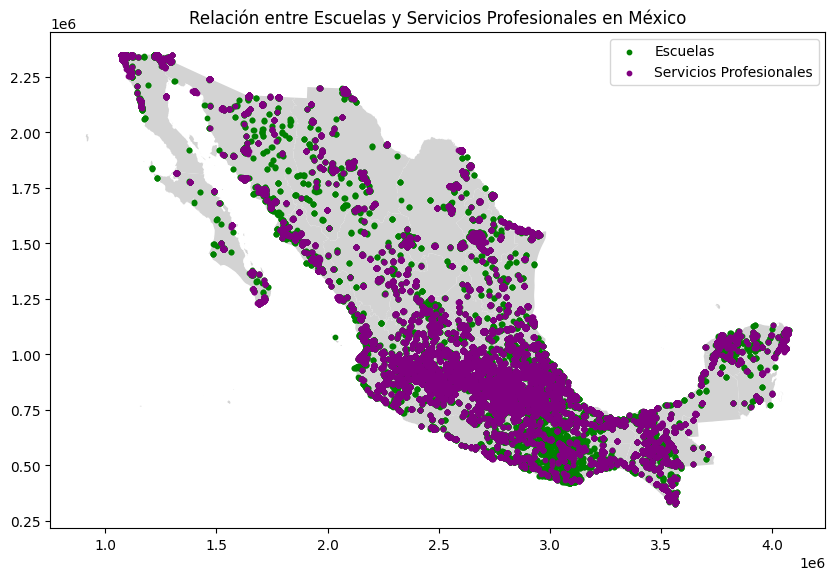

In [22]:
# Leer los datos de servicios
servicios = gpd.read_file('Servicios/conjunto_de_datos')

# Convertir los datos de servicios a un sistema de coordenadas proyectadas (EPSG: 6372)
servicios = servicios.to_crs(epsg=6372)

# Definir los patrones regex para filtrar escuelas por nivel educativo
regex_primaria = r"(?i)(primaria|escuela básica|escuela elemental)"
regex_secundaria = r"(?i)(secundaria|escuela media|educación media)"
regex_prep_bach = r"(?i)(preparatoria|bachillerato|prepa|colegio)"

# Filtrar las escuelas según los patrones regex
escuelas_filtradas = escuelas[
    escuelas['nombre_act'].str.contains(regex_primaria) |
    escuelas['nombre_act'].str.contains(regex_secundaria) |
    escuelas['nombre_act'].str.contains(regex_prep_bach)
]

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los polígonos de los estados en gris claro
estados.plot(ax=ax, color='lightgrey')

# Graficar las escuelas filtradas en verde
escuelas_filtradas.plot(ax=ax, color='green', markersize=10, label='Escuelas')

# Graficar los servicios profesionales en púrpura
servicios.plot(ax=ax, color='purple', markersize=10, label='Servicios Profesionales')

# Añadir leyenda
ax.legend()

# Añadir título
ax.set_title('Relación entre Escuelas y Servicios Profesionales en México')

# Mostrar el gráfico
plt.show()

hay una mayor concentracion de escuelas y servicios hacia el centro del pais yy en las capitales de los estados, y los puntos fronterisos 